In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('CSKvsSRH/CSKvsSRH.csv')

In [81]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [82]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,0.1,Sunrisers Hyderabad,Chennai Super Kings,DA Warner,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,0.2,Sunrisers Hyderabad,Chennai Super Kings,JM Bairstow,DA Warner,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,0.3,Sunrisers Hyderabad,Chennai Super Kings,DA Warner,JM Bairstow,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,0.4,Sunrisers Hyderabad,Chennai Super Kings,DA Warner,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,0.5,Sunrisers Hyderabad,Chennai Super Kings,DA Warner,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,0.6,Sunrisers Hyderabad,Chennai Super Kings,DA Warner,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,0.7,Sunrisers Hyderabad,Chennai Super Kings,DA Warner,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,1.1,Sunrisers Hyderabad,Chennai Super Kings,JM Bairstow,DA Warner,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,1.2,Sunrisers Hyderabad,Chennai Super Kings,DA Warner,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1254080,2021,2021-04-28,"Arun Jaitley Stadium, Delhi",1,1.3,Sunrisers Hyderabad,Chennai Super Kings,DA Warner,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
def show_summary(df):
    df['total_runs'] = df['runs_off_bat'] + df['extras']
    df1 = df[df.innings == 1]
    df2 = df[df.innings == 2]

    df1.reset_index(inplace = True, drop = True)
    df2.reset_index(inplace = True, drop = True)

    df1['cum_runs'] = 0
    df2['cum_runs'] = 0

    runs_count = 0
    for i in range(len(df1)):
        runs_count += df1['total_runs'][i]
        df1['cum_runs'][i] = runs_count

    runs_count = 0
    for i in range(len(df2)):
        runs_count += df2['total_runs'][i]
        df2['cum_runs'][i] = runs_count

    ball_no_ing1 = [i for i in range(1, len(df1) + 1)]
    ball_no_ing2 = [i for i in range(1, len(df2) + 1)]

    wk_index1 = list(df1[~df1.player_dismissed.isna()].index)
    wk_index2 = list(df2[~df2.player_dismissed.isna()].index)

    wk_runs1 = list(df1[df1.index.isin(wk_index1)].cum_runs)
    wk_runs2 = list(df2[df2.index.isin(wk_index2)].cum_runs)

    team1 = df1.batting_team[0]
    team2 = df2.batting_team[0]

    plt.figure(figsize = (16, 6))

    plt.plot(ball_no_ing1, df1.cum_runs, linewidth = 3, label = team1, color = 'orange')
    plt.plot(ball_no_ing2, df2.cum_runs, linewidth = 3, label = team2,color = 'y')

    plt.scatter(wk_index1, wk_runs1, s = 150, c ='orange')
    plt.scatter(wk_index2, wk_runs2, s = 150, c = 'y')

    plt.axvline(x = 36, ls = '--', c = 'g')
    plt.axvline(x = 90, ls = '--', c = 'g')

    plt.text(16, 1.01, "Powerplay")
    plt.text(60, 1.01, "Middle Overs")
    plt.text(105, 1.01, "Death Overs")

    plt.xlabel("Ball Number")
    plt.ylabel("Runs")
    plt.title("Match Summary - Runs progression Chart")
    plt.legend()

    plt.show()

/home/saikrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/saikrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/saikrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

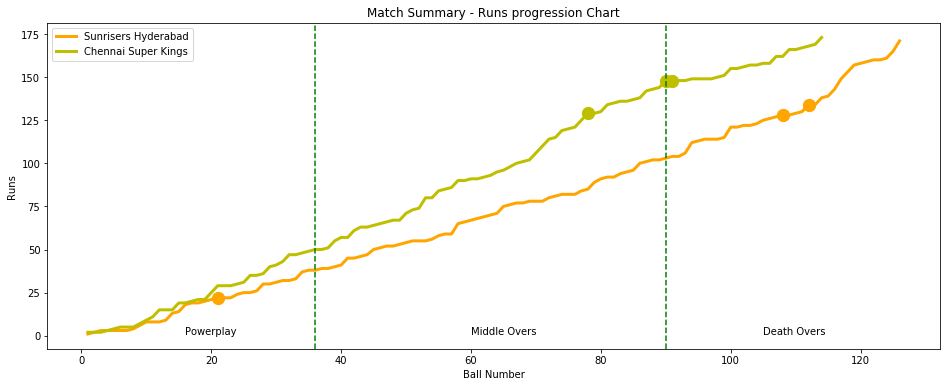

In [67]:
show_summary(df)

In [84]:
def player(df, player_name, match):
    df['overs']=df['ball']
    df['ball'] = df['ball'].astype(str)
    df['over']=df['ball'].str[0:-1]
    df['over']=df['over'].str.replace('.', '')
    df['over'] = pd.to_numeric(df['over'])
    df['ball']=df['ball'].str[-1:]
    df['ball'] = pd.to_numeric(df['ball'])

    df['phase'] = df['over'].apply(lambda x : 'powerplay' if x < 6 else('middle' if x <16 else 'death'))
    df['wides'] = df['wides'].fillna(0)
    df.drop(df[df['wides']!=0].index,inplace = True)

    player_df = df[df.striker == player_name]

    player_df = player_df[['over', 'ball', 'phase', 'striker', 'bowler', 'runs_off_bat']]
    player_df.reset_index(inplace = True, drop = True)
    filename = match + '/' + player_name + '.xlsx'
    player_df.to_excel(filename)

In [85]:
df.striker.unique()

array(['DA Warner', 'JM Bairstow', 'MK Pandey', 'KS Williamson',
       'KM Jadhav', 'RD Gaikwad', 'F du Plessis', 'MM Ali', 'RA Jadeja',
       'SK Raina'], dtype=object)

In [86]:
player(df, 'RD Gaikwad','CSKvsSRH')
